**PREDICTING THE PRICE OF LITECOIN USING MACHINE LEARNINNG**

**NumPy** stands for ‘Numerical Python’ or ‘Numeric Python’. It is an open source module of Python which provides fast mathematical computation on arrays and matrices. NumPy provides the essential multi-dimensional array-oriented computing functionalities designed for high-level mathematical functions and scientific computation.

Similar to NumPy, **Pandas** is one of the most widely used python libraries in data science. It provides high-performance, easy to use structures and data analysis tools. Unlike NumPy library which provides objects for multi-dimensional arrays, Pandas provides in-memory 2d table object called Dataframe. It is like a spreadsheet with column names and row labels.

Numpy and Pandas can be imported into the notebook with the below metioned code snippet. 

In [71]:
import pandas as pd
import numpy as np

To import the CSV (Comma seperated value) file, we have to write the below mentioned code snippet and then we will be uploading the dataset "**coin_Litecoin.csv**"

In [72]:
from google.colab import files
uploaded = files.upload()

Saving coin_Litecoin.csv to coin_Litecoin (3).csv


Now it's time to understand one of the most important thing, which is a Dataframe
**DataFrame** is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. 

We have converted the CSV file to a dataframe usig pandas and then we have stored it in a varible named "**df**"

In [73]:
df=pd.read_csv('coin_Litecoin.csv')

It is very important to analyze the dataset before performing the Data cleaning process. **df.head()** function will allow us to display the top 5 rows of the DataFrame "**df**". We can now clearly see the complete Dataset. it consists of different columns like Seriel number, Name, date etc.

In [74]:
df.head(10)  #passing the parameter 10 (df.head(10)) will display top 10 rows.

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Litecoin,LTC,2013-04-29 23:59:59,4.57360,4.22564,4.36676,4.38390,0.0,7.538896e+07
1,2,Litecoin,LTC,2013-04-30 23:59:59,4.57238,4.16896,4.40352,4.29649,0.0,7.402092e+07
2,3,Litecoin,LTC,2013-05-01 23:59:59,4.35686,3.52029,4.28954,3.80101,0.0,6.560460e+07
3,4,Litecoin,LTC,2013-05-02 23:59:59,4.03930,3.00717,3.78002,3.37198,0.0,5.828798e+07
4,5,Litecoin,LTC,2013-05-03 23:59:59,3.45361,2.39594,3.39044,3.04491,0.0,5.269485e+07
5,6,Litecoin,LTC,2013-05-04 23:59:59,3.63828,2.89525,3.03227,3.47962,0.0,6.029087e+07
6,7,Litecoin,LTC,2013-05-05 23:59:59,3.69246,3.34606,3.49313,3.59089,0.0,6.229819e+07
7,8,Litecoin,LTC,2013-05-06 23:59:59,3.78102,3.11602,3.59422,3.37125,0.0,5.859436e+07
8,9,Litecoin,LTC,2013-05-07 23:59:59,3.40672,2.93979,3.37087,3.33274,0.0,5.805127e+07
9,10,Litecoin,LTC,2013-05-08 23:59:59,3.49112,3.28362,3.28362,3.40924,0.0,5.950822e+07


Keeping those columns is the dataframe which will not be usefull in prediction process is noT a good strategy. Here we will be dropping several columns of our dataset and will be keeping only the "**Close**" column.

Here Close column comprises of the amount of Litecoin cryptocurrency in USD.


In [75]:
df.drop(columns=['SNo','Name','Symbol','Date','High','Low','Open','Volume','Marketcap'], inplace=True) #When inplace = True , the data is modified in place, which means it will return nothing and the dataframe is now updated. When inplace = False , which is the default, then the operation is performed and it returns a copy of the object.

In [76]:
df.head(10)

,Close
0,4.38390
1,4.29649
2,3.80101
3,3.37198
4,3.04491
5,3.47962
6,3.59089
7,3.37125
8,3.33274
9,3.40924


In [77]:
prediction_days = 25  # A variable for predicting 'n' days out into the future. 

In [78]:
# Now we will make a new column which will be shifted 'n' units up. It'll contain the 'close' price but the only difference will be, that this column will be shifted 25 rows up.
df['Prediction']=df[['Close']].shift(-prediction_days)

In [79]:
df.head(10)

,Close,Prediction
0,4.38390,3.17948
1,4.29649,3.11869
2,3.80101,3.24890
3,3.37198,3.10091
4,3.04491,3.09213
5,3.47962,3.09582
6,3.59089,2.97139
7,3.37125,2.95668
8,3.33274,2.82650
9,3.40924,2.72712


In [80]:
df.tail(26)

,Close,Prediction
2836,142.506975,172.100447
2837,155.612033,NaN
2838,145.148187,NaN
2839,154.852216,NaN
2840,155.714742,NaN
2841,151.140079,NaN
2842,167.219058,NaN
2843,182.114468,NaN
2844,182.174392,NaN
2845,184.496000,NaN


In [81]:
# Create the independent dataset

# Convert the data to a numpy array and drop the prediction column.(Because it contains the target variables)

X=np.array(df.drop(['Prediction'],1))

# We now have to remove the last 'n' rows where 'n' is the prediction_days (25 in our case) 

X=X[:len(df)-prediction_days]

print(X)

[[  4.38390017]
 [  4.29649019]
 [  3.80100989]
 ...
 [129.5708153 ]
 [131.95193202]
 [142.50697498]]


In [82]:
# Create the dependent dataset. 

# Convert the dataframe to a numpy array.

y=np.array(df['Prediction'])

# Get all the values except the last 'n' rows

y=y[:-prediction_days]
print(y)

[  3.17948008   3.11869001   3.24889994 ... 178.90184288 170.39815323
 172.10044726]


Now here we will split the entire data to training and test set. We will be using **train_test_split** function from the library **sklearn**.


**Training data= 80%**

**Test data= 20%**

In [83]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=1)

In [84]:
# Now we need to create a new variable "prediction_days_array" and have to make it equal to the last 25 rows from the original dataset (only the 'close' column)

prediction_days_array=np.array(df.drop(['Prediction'],1))[-prediction_days:]
print(prediction_days_array)

[[155.61203291]
 [145.14818702]
 [154.85221567]
 [155.71474239]
 [151.14007922]
 [167.21905755]
 [182.1144683 ]
 [182.1743915 ]
 [184.49599958]
 [197.23171013]
 [226.22760116]
 [214.430273  ]
 [207.68101945]
 [210.5465771 ]
 [236.97352307]
 [226.86954839]
 [236.67601167]
 [227.61989221]
 [227.23135545]
 [208.10679546]
 [176.93491521]
 [181.37850129]
 [178.90184288]
 [170.39815323]
 [172.10044726]]


Finally the wait is over, we are about to create a model using Support Vector machine.

**So what is SVM?**

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points. 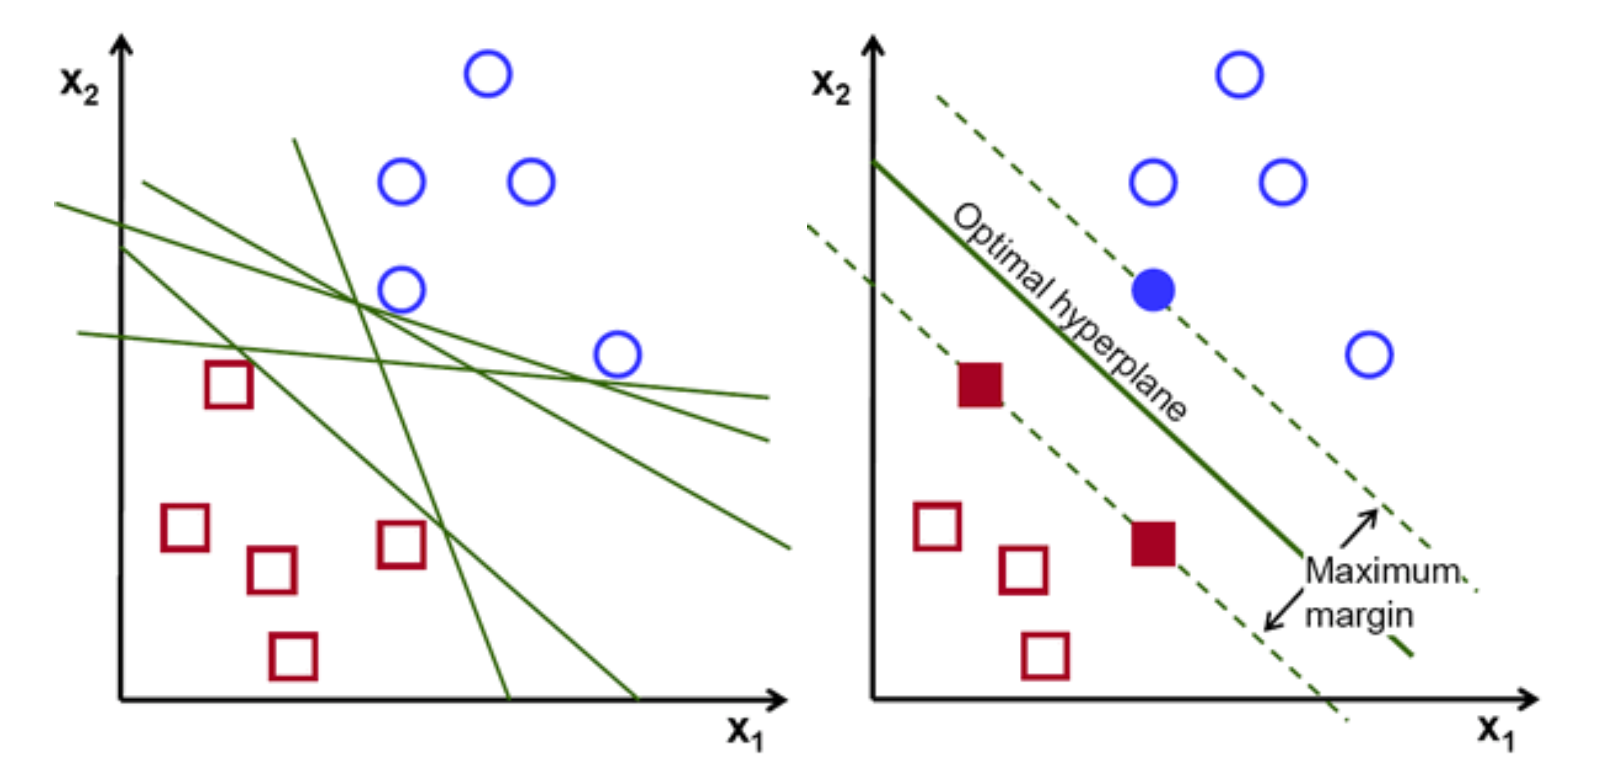

To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.

For gaining some more knowledge on SVM, refer the link mentioned below

(https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47)

In [85]:
from sklearn.svm import SVR

# Now create and train the Support vector machine (Which is using Regression) using radial basis function.

svr_rbf= SVR(kernel='rbf',C=1e3, gamma=0.00001)

In [86]:
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1e-05,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [87]:
# Let's test our model

svr_rbf_confidence = svr_rbf.score(x_test, y_test)

In [88]:
print("svr_rbf_accuracy: ", svr_rbf_confidence )

svr_rbf_accuracy:  0.787916159480404


In [89]:
# Let's Predict the values of litecoin (wuhuu!!)

svm_prediction= svr_rbf.predict(x_test)

print(svm_prediction)

print()
print()

# Print the actual value as well

print(y_test)

[ 50.45519684   4.64814162   3.59111103  77.69449098  50.08019093
   3.13520168   3.23422929  54.17336412 175.48785708  40.2023466
   4.18640632  55.82407201  44.14500187   1.63934891   2.74606519
  81.33371419  58.36703967 145.87736877  39.17701277  11.20533596
   4.95839468   4.7876618   91.18083679  92.39977397  77.46529296
  32.88304808  50.24714979 106.67504895  73.08196361 103.89597799
   5.42685981  57.87544173   3.04529967  55.30033705   3.26060332
  60.39327252  68.15800756   3.83375361   3.59817684 140.16760758
  52.63863941   3.08408748   4.04348526  74.06484078 151.11241232
   2.54816925  75.96996481  10.0277578  132.73837893   3.60404166
 108.53150464  97.55006085   3.49187226   3.07588364  43.41210502
  51.0480349    2.20488589 119.43700666   2.73143052  45.0361115
  55.92680859  59.13418607   3.79588926   3.09775351 131.61260956
   1.61923524  83.69954653  63.62887436  35.0500103    2.91099453
 107.62666667   2.52898465  78.7523234    4.4146982  116.76630626
  25.5189681

In [90]:
# Print the model predictions for 'n=25' 

svm_prediction_n= svr_rbf.predict(prediction_days_array)
print(svm_prediction_n)

# Print the actual prize of litecoin for last 25 days. 

print(df.tail(prediction_days))

[132.74924165 126.60600842 132.31469297 132.80784987 130.1663392
 139.18392251 146.95984482 146.99021392 148.16192666 154.44375637
 168.25450095 162.669601   159.46360301 160.82709506 173.37288472
 168.55885725 173.23029628 168.91476545 168.73044958 159.66646324
 144.30926375 146.58632497 145.32193841 140.88486848 141.78580319]
           Close  Prediction
2837  155.612033         NaN
2838  145.148187         NaN
2839  154.852216         NaN
2840  155.714742         NaN
2841  151.140079         NaN
2842  167.219058         NaN
2843  182.114468         NaN
2844  182.174392         NaN
2845  184.496000         NaN
2846  197.231710         NaN
2847  226.227601         NaN
2848  214.430273         NaN
2849  207.681019         NaN
2850  210.546577         NaN
2851  236.973523         NaN
2852  226.869548         NaN
2853  236.676012         NaN
2854  227.619892         NaN
2855  227.231355         NaN
2856  208.106795         NaN
2857  176.934915         NaN
2858  181.378501         NaN
285

In [92]:
df['Actual cost of Litecoin of last 25 days'] = pd.DataFrame(prediction_days_array)
df['Predicted Cost of Litecoin of last 25 days'] = pd.DataFrame(svm_prediction_n)
A=df
A.drop(columns=['Close','Prediction'], inplace= True)


In [93]:
A.head(25)

,Actual cost of Litecoin of last 25 days,Predicted Cost of Litecoin of last 25 days
0,155.612033,132.749242
1,145.148187,126.606008
2,154.852216,132.314693
3,155.714742,132.807850
4,151.140079,130.166339
5,167.219058,139.183923
6,182.114468,146.959845
7,182.174392,146.990214
8,184.496000,148.161927
9,197.231710,154.443756


[]

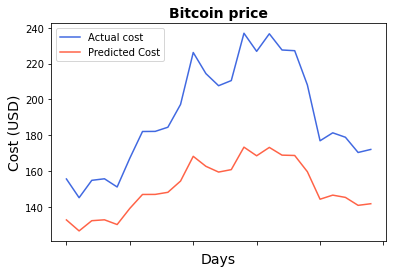

In [97]:
original = df['Actual cost of Litecoin of last 25 days']
predictions = df['Predicted Cost of Litecoin of last 25 days']

ax = sns.lineplot(x=df.index, y=original, label="Actual cost ", color='royalblue')
ax = sns.lineplot(x=df.index, y=predictions, label="Predicted Cost", color='tomato')
ax.set_title('Bitcoin price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)